In [1]:
#word2vec is a shallow two layered NN which converts text into vectors so that machine can understand our natural language. 
#word2vec creates dense vectors unlike Tf - Idf. 

import pandas as pd
data_spam = pd.read_csv("Desktop/Dataset/spam.csv",encoding ='latin-1')


#we can observe that unnamed2, unnamed3, unnamed 4 has blank values, therefore we can drop these things.
data_spam = data_spam.drop(columns=['Unnamed: 2', 'Unnamed: 3','Unnamed: 4'],axis = 1)


#Changed the column names in a dataset
data_spam.columns = ["Labels","Text"]


print(data_spam.shape)
data_spam.head()

(5572, 2)


,Labels,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
import gensim
import re
import nltk


data_spam['cleantext'] = data_spam['Text'].apply(lambda x: gensim.utils.simple_preprocess(x))    
x_train,x_test,y_train,y_test = train_test_split(data_spam['cleantext'] , data_spam['Labels'],test_size = 0.2)

In [3]:
from keras.models import Sequential,load_model
from keras.layers import Dense,LSTM,Embedding,Dropout,Bidirectional
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()#Tokenizer in keras helps to convert the text into sequence of numbers based on tf-idf or wordcount.
tokenizer.fit_on_texts(x_train,)
train_sequences = tokenizer.texts_to_sequences(x_train)# converting into sequence of vectors
test_sequences = tokenizer.texts_to_sequences(x_test)
train_data_seq = pad_sequences(train_sequences, maxlen = 100)
test_data_seq = pad_sequences(test_sequences, maxlen = 100)

Using TensorFlow backend.


In [4]:
from sklearn.preprocessing import LabelBinarizer
binarizer = LabelBinarizer()
binarizer.fit(y_train)
# LabelBinarizer helps in converting coverting each label such as positive, negative ,neutral in twitter sets to unique numbers 
y_train = binarizer.transform(y_train)
y_test = binarizer.transform(y_test)

In [5]:
import tensorflow as tf

model = Sequential()
model.add(Embedding(len(tokenizer.index_word)+1,100))

model.add(LSTM(100,dropout = 0, recurrent_dropout = 0))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(20, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])
#one epoch is very huge to go forward and backwards in neural network 
#so we didvide the data into multiple sets and epoch helps in increasing the model accuracy.
history = model.fit(train_data_seq,y_train,batch_size = 32,epochs =10,validation_data = (test_data_seq, y_test))

/Users/Geethika/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 4457 samples, validate on 1115 samples
Epoch 1/10
4457/4457 [==============================] - 18s 4ms/step - loss: 0.2681 - accuracy: 0.9020 - precision: 0.3508 - recall: 0.2569 - val_loss: 0.0736 - val_accuracy: 0.9812 - val_precision: 0.7201 - val_recall: 0.5578
Epoch 2/10
4457/4457 [==============================] - 15s 3ms/step - loss: 0.0708 - accuracy: 0.9838 - precision: 0.8106 - recall: 0.6808 - val_loss: 0.0907 - val_accuracy: 0.9839 - val_precision: 0.8538 - val_recall: 0.7515
Epoch 3/10
4457/4457 [==============================] - 15s 3ms/step - loss: 0.0497 - accuracy: 0.9912 - precision: 0.8793 - recall: 0.7916 - val_loss: 0.1179 - val_accuracy: 0.9839 - val_precision: 0.8967 - val_recall: 0.8206
Epoch 4/10
4457/4457 [==============================] - 15s 3ms/step - loss: 0.0392 - accuracy: 0.9944 - precision: 0.9089 - recall: 0.8413 - val_loss: 0.1548 - val_accuracy: 0.9812 - val_precision: 0.9181 - val_recall: 0.8574
Epoch 5/10
4457/4457 [======================

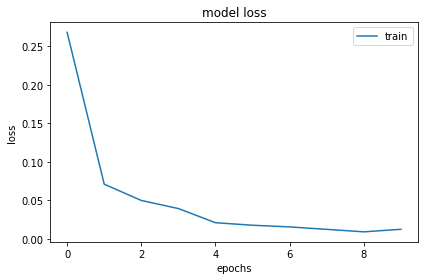

In [6]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train'], loc='upper right')
plt.tight_layout() 
plt.show()